In [37]:
import numpy as np
import pandas as pd
import math 
import datetime as dt

# Import Dataset

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', -1)

C:\Users\Pierr\AppData\Local\Temp\ipykernel_8936\2319395250.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [39]:
#import dataset
path='/Users/Pierr/OneDrive/Documents/CentraleSupelec/MLAirBnb/train_airbnb_berlin.csv'
my_sep,my_encoding=',','utf-8'
types={'Listing ID':'str','Host ID':'str','Postal Code':'str'}
df=pd.read_csv(path,sep=my_sep,encoding=my_encoding,dtype=types)

# Preprocessing

## Types

In [40]:
def drop_virgule(x):
    try:return x.split('.')[0]
    except:return x
    
# Drop the '.0' in IDs and Postal Code
df['Listing ID']=df['Listing ID'].apply(drop_virgule)              
df['Host ID']=df['Host ID'].apply(drop_virgule)
df['Postal Code']=df['Postal Code'].apply(drop_virgule)

In [41]:
# Convert values to datetime
df['Host Since']=pd.to_datetime(df['Host Since']).map(dt.datetime.toordinal)
df['First Review']=pd.to_datetime(df['First Review']).map(dt.datetime.toordinal)
df['Last Review']=pd.to_datetime(df['Last Review']).map(dt.datetime.toordinal)

In [42]:
# Put NaN in missing values where we have *
df['Accomodates'].replace('*', np.nan,inplace=True)                 
df['Bathrooms'].replace('*', np.nan,inplace=True)
df['Bedrooms'].replace('*', np.nan,inplace=True)
df['Beds'].replace('*', np.nan,inplace=True)
df['Guests Included'].replace('*', np.nan,inplace=True)
df['Min Nights'].replace('*', np.nan,inplace=True)
df['Postal Code'].replace('*', np.nan,inplace=True)
df['neighbourhood'].replace('*', np.nan,inplace=True)
df['Property Type'].replace('*', np.nan,inplace=True)
df['Host Response Rate'].replace('*', np.nan,inplace=True)

In [43]:
#replacing str percentage to float value
df['Host Response Rate'].replace('nan', np.nan,inplace=True)
df['Host Response Rate']=df[~df['Host Response Rate'].isnull()]["Host Response Rate"].str.split('%').apply(lambda x:float(x[0])/100)

In [44]:
# Convert values to float
df['Accomodates'] = df['Accomodates'].astype('float')              
df['Bathrooms'] = df['Bathrooms'].astype('float')
df['Bedrooms'] = df['Bedrooms'].astype('float')
df['Beds'] = df['Beds'].astype('float')
df['Guests Included'] = df['Guests Included'].astype('float')
df['Min Nights'] = df['Min Nights'].astype('float')  

## Feature Engineering 

In [45]:
centres_berlins = [["berlin_center",52.5200,52.5200],
                   ["charlottenburg", 52.516602, 13.304105],
                   ["kreuzberg", 52.498605, 13.391799],
                   ["wedding", 52.561559, 13.35002],
                   ["mitte", 52.531677, 13.381777],
                   ["mariendorf", 52.4333316, 13.3833318],
                   ["tegel", 52.558833, 13.288437], 
                   ["tempelhof", 52.472160, 13.370287],
                   ["spandau", 52.534080, 13.181716],
                   ["schöneberg", 52.497161, 13.346865],
                   ["wilmersdorf",  52.48333, 13.31667],
                   ["biesdorf", 52.508429, 13.563317],
                   ["moabit", 52.530832, 13.345876],
                   ["britz", 52.45, 13.433333],
                   ["neukölln", 52.440771, 13.444507],
                   ["dahlem", 52.466562, 13.300082], 
                   ["tiergarten", 52.51449, 13.350091],
                   ["hellersdorf", 52.536107, 13.604973],
                   ["prenzlauer_berg", 52.550113, 13.423125], 
                   ["friedrichshain", 52.515816, 13.454293],
                   ["reinickendorf", 52.566667, 13.333333],
                   ["friedrichsfelde", 52.503664652, 13.507664636],
                   ["friedenau", 52.47133, 13.32813],
                   ["gesundbrunnen", 52.548611, 13.390278],
                   ["charlottenbourg_nord", 52.53048, 13.29371],
                   ["hansaviertel", 52.5166646, 13.33666532],
                   ["haselhorst", 52.54409, 13.23743],
                   ["gropiusstadt", 52.425, 13.46667],
                   ["westend", 52.5166646, 13.2833322],
                   ["wittenau", 52.592455, 13.329694],
                   ["zehlendorf", 52.435077, 13.260425],
                   ["lichtenberg", 52.534306, 13.502326],
                   ["pankow", 52.592879, 13.431700],
                   ["steglitz", 52.453096, 13.331171],
                   ["siemenstadt", 52.537664516, 13.257832302],
                   ["rudow", 52.402310, 13.509220],
                   ["kaulsdorf", 52.506512, 13.593946]]

def distance_from_lat_long(lat1,lon1,lat2,lon2):
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (math.sin(dlat/2))**2 + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2))**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return R * c

def add_distance_from_hotspots_feature(df):
    for lieu in centres_berlins:                                       # Add distances 
        name_column = "distance_" + str(lieu[0])
        df[name_column] = df.apply(lambda x : distance_from_lat_long(x['Latitude'], x['Longitude'], lieu[1], lieu[2]), axis = 1)
    return df

#distance from berlin's hotspots
df = add_distance_from_hotspots_feature(df)

In [46]:
#specified irrelevant columns to drop
columns_to_drop=['Listing Name','Host Name','City','Country Code','Country','Postal Code',
                 'Square Feet','Business Travel Ready','Host ID','Listing ID','Neighborhood Group']
df.drop(columns=columns_to_drop,inplace=True) 

In [47]:
# Rename the columns lowercase with '_' instead of ' '
df.columns = df.columns.str.lower().str.replace(' ','_')           

In [48]:
#drop price missing (9rows)
df.dropna(subset=['price'], inplace=True)    

# droping outlighers for prices >300
df = df[(df['price'] < 300)]

In [49]:
#droping rows where there is more than 3 nan 
#from dataviz we saw that it was the best option
df = df[df.isnull().sum(1)<4]

In [50]:
numerical_columns = df.select_dtypes(exclude=object).columns   # numeric columns names
categorical_columns = df.select_dtypes(include=object).columns # categorical columns names

df_num = df[numerical_columns]    # dataframe with numeric columns only
df_cat = df[categorical_columns]  # dataframe with categorical columns only

## One Hot Encoder

In [51]:
df=pd.get_dummies(df,drop_first=True)
df

,host_since,host_response_rate,latitude,longitude,accomodates,bathrooms,bedrooms,beds,guests_included,min_nights,reviews,first_review,last_review,overall_rating,accuracy_rating,cleanliness_rating,checkin_rating,communication_rating,location_rating,value_rating,price,distance_berlin_center,distance_charlottenburg,distance_kreuzberg,distance_wedding,distance_mitte,distance_mariendorf,distance_tegel,distance_tempelhof,distance_spandau,distance_schöneberg,distance_wilmersdorf,distance_biesdorf,distance_moabit,distance_britz,distance_neukölln,distance_dahlem,distance_tiergarten,distance_hellersdorf,distance_prenzlauer_berg,distance_friedrichshain,distance_reinickendorf,distance_friedrichsfelde,distance_friedenau,distance_gesundbrunnen,distance_charlottenbourg_nord,distance_hansaviertel,distance_haselhorst,distance_gropiusstadt,distance_westend,distance_wittenau,distance_zehlendorf,distance_lichtenberg,distance_pankow,distance_steglitz,distance_siemenstadt,distance_rudow,distance_kaulsdorf,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,is_superhost_t,neighbourhood_Alt-HohenschÃ¶nhausen,neighbourhood_Alt-Treptow,neighbourhood_Altglienicke,neighbourhood_Baumschulenweg,neighbourhood_Biesdorf,neighbourhood_Britz,neighbourhood_Buckow,neighbourhood_Charlottenburg,neighbourhood_Dahlem,neighbourhood_Fennpfuhl,neighbourhood_FranzÃ¶sisch Buchholz,neighbourhood_Friedenau,neighbourhood_Friedrichsfelde,neighbourhood_Friedrichshagen,neighbourhood_Friedrichshain,neighbourhood_Grunewald,neighbourhood_Halensee,neighbourhood_Hansaviertel,neighbourhood_Johannisthal,neighbourhood_Karlshorst,neighbourhood_Karow,neighbourhood_Kreuzberg,neighbourhood_KÃ¶penick,neighbourhood_Lankwitz,neighbourhood_Lichtenberg,neighbourhood_Lichtenrade,neighbourhood_Lichterfelde,neighbourhood_Mahlsdorf,neighbourhood_Mariendorf,neighbourhood_Marzahn,neighbourhood_Mitte,neighbourhood_Moabit,neighbourhood_NeukÃ¶lln,neighbourhood_NiederschÃ¶neweide,neighbourhood_NiederschÃ¶nhausen,neighbourhood_Nikolassee,neighbourhood_OberschÃ¶neweide,neighbourhood_Pankow,neighbourhood_PlÃ¤nterwald,neighbourhood_Potsdamer Platz,neighbourhood_Prenzlauer Berg,neighbourhood_Rahnsdorf,neighbourhood_Reinickendorf,neighbourhood_Rudow,neighbourhood_Rummelsburg,neighbourhood_Schmargendorf,neighbourhood_SchmÃ¶ckwitz,neighbourhood_SchÃ¶neberg,neighbourhood_Spandau,neighbourhood_Steglitz,neighbourhood_Tegel,neighbourhood_Tempelhof,neighbourhood_Tiergarten,neighbourhood_Wannsee,neighbourhood_Wedding,neighbourhood_WeiÃensee,neighbourhood_Westend,neighbourhood_Wilhelmstadt,neighbourhood_Wilmersdorf,neighbourhood_Wittenau,neighbourhood_Zehlendorf,is_exact_location_t,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,instant_bookable_t
0,735983,NaN,52.54652,13.41792,2.0,1.0,1.0,1.0,1.0,2.0,6,736517,736549,100.0,10.0,10.0,10.0,10.0,9.0,10.0,26.0,5445.861668,502.032440,323.050128,300.267060,176.383932,733.616904,547.304942,510.186083,976.254289,425.477861,570.838732,638.152932,312.970675,618.064475,681.800042,690.264484,343.662639,774.720859,31.528787,245.578185,377.971134,454.522861,596.942099,115.767769,521.202675,382.327064,748.503312,796.741992,581.159063,476.584196,935.387531,356.759249,301.233086,685.484102,663.763956,981.525905,757.665468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,734965,NaN,52.56512,13.42214,2.0,1.0,2.0,2.0,2.0,7.0,6,735744,737179,90.0,9.0,9.0,10.0,10.0,9.0,10.0,41.0,5498.706905,576.720530,441.605192,306.303245,271.409293,853.451525,566.673348,627.875735,1020.381304,530.759406,673.1

## Missing Values

1
3
5
7
9
11
13
15
17
19


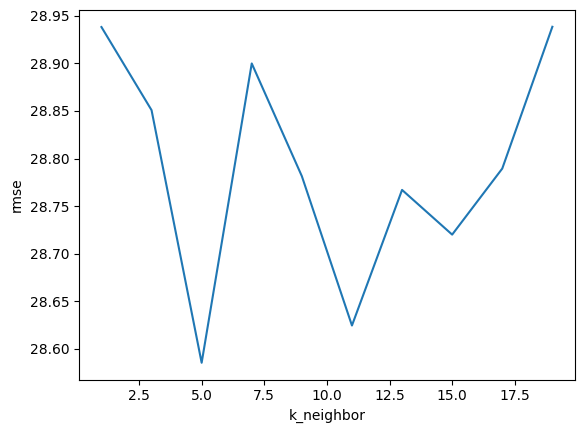

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        print(k)
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors
k_errors = optimize_k(data=df, target='price')

k=[list(i.values())[0] for i in k_errors]
r=[list(i.values())[1] for i in k_errors]

from matplotlib import pyplot as plt
plt.xlabel('k_neighbor')
plt.ylabel('rmse')
plt.plot(k,r)

In [53]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

# Exporting to csv

In [54]:
path_preprocessing=path.split('.')[0]+'_Preprocessed.csv'
sep=','
df.to_csv(path_preprocessing,sep=sep,index=False)